### This Jupyter Notebook shows how to load the Twitter data into a dataframe

Useful links

* Introduction to Jupyter Notebooks: [Jupyter Notebook Tutorial: Introduction, Setup, and Walkthrough](https://www.youtube.com/watch?v=HW29067qVWk)
* Getting started with pandas https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/index.html
* Getting started with natural language processing (NLP) with NLTK https://www.nltk.org/book/

In [1]:
import os
import json
import re
import nltk
import numpy as np
import pandas as pd
import random
from collections import Counter
from nltk.stem.porter import PorterStemmer
from pprint import pprint
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.text import Text
from wordcloud import WordCloud
from nltk.util import ngrams
from itertools import combinations 
import seaborn as sns
import matplotlib.pyplot as plt

nltk.download('stopwords')
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option('display.width',None)
pd.set_option('display.max_colwidth', None)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Brands\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Search terms for the corpus: 
Fake news
Propaganda
Disinformation
Active measures
Subversion
Interference
Influence
Conspiracy
Deep state
Misinformation
Fabrication
Manipulate
Deceive
Useful idiots
Mainstream media
Populism
Untrustworthy
Hoax
Made-up
Bogus
Inaccurate
Doctored
Fact Checking
eu False
eu Fraud
eu Hoax
eu Lies
eu Rumours
eu Troll
europe False
europe Fraud
europe Hoax
europe Lies
europe Rumours
europe Troll
european False
european Fraud
european Hoax
european Lies
european Rumours
european Troll 

In [2]:
df = pd.read_pickle(r"C:\Users\Brands\Documents\Cardiff\Dissertation work\Data_analysis\Data\June_2019\climate_df_June19.pkl")

In [28]:
df.head(100)

,tweet_id,hashtags,tweet_text,is_reply,is_retweet,user_name,created
2580,1134969357790924800,[],"@soulsinrhythm fake news, bud. numbers are declining, size of fires are declining. the only thing that is rising is the blood pressure of climate alarmists who aren’t getting what they want. https://t.co/uk4dset5yi",soulsinrhythm,False,Gryffindave,Sat Jun 01 23:45:56 +0000 2019
2659,1134969262118985728,[],has those crazy climate scientists superceded poopy fake news too far?,None,False,hassciencebot,Sat Jun 01 23:45:33 +0000 2019
5336,1134965727599976448,[],"@pbethlenfalvy hey, peter! we are too educated to fall for the @ontariopcparty weekly propaganda pictures. do some real good and focus on what ontarians and your constituents really care about: health, education, climate change, and most importantly social programmes, #not beer #ridiculouspccon",PBethlenfalvy,False,dismomx5,Sat Jun 01 23:31:30 +0000 2019
5436,1134965599245918208,[],"@davesmithptbo hey, dave! we are too educated to fall for the @ontariopcparty weekly propaganda pictures. do some real good and focus on what ontarians and your constituents really care about: health, education, climate change, and most importantly social programmes, #not beer #ridiculouspccon",DaveSmithPtbo,False,dismomx5,Sat Jun 01 23:31:00 +0000 2019
6085,1134964757600120832,[],"rt @l1quidcryst4l: it’s also important to distinct this from the right-wing “fema camp” conspiracy, in that:\n1. climate breakdown is actual…",None,False,liam_pelosky,Sat Jun 01 23:27:39 +0000 2019
6126,1134964697608916992,[],rt @l1quidcryst4l: this is weird conspiracy theory prepper bullshit. this is a sober assessment of existing best-case climate models paired…,None,False,liam_pelosky,Sat Jun 01 23:27:25 +0000 2019
6268,1134964506919145472,[],"@lisaoconnor15 @harry_hardrada @peikko763 @snowbiewx @climaterealists human influence is small, ocean cycles and orbital resonance are key features in climate.\nthe only misinformation coming across is from you!",lisaoconnor15,False,dbirch214,Sat Jun 01 23:26:39 +0000 2019
6610,1134964044320972800,[],"@grahamelwood they still think accepting the reality of russian interference in 2016 is identical to supporting hilary clinton. they couldn't be more wrong. i really don't know what game they're playing, but it's basically left wing version of climate change denial at this point.",Mathemagicianme,False,Mathemagicianme,Sat Jun 01 23:24:49 +0000 2019
7135,1134963360724918273,"[ClimateChange, globalwarming]",rt @maggielet: @hassi99 #climatechange &amp; #globalwarming caused by humans is fake news. pollution by humans is real news. correct. https://t…,None,False,VUsamaga,Sat Jun 01 23:22:06 +0000 2019
7425,1134962965717721088,[],"@senduckworth oh good grief! stop the propaganda. climate/weather has been changing, going through normal cycles for 4.5 billion years and there is nothing you democrats can do about it.",SenDuckworth,False,NancyKrause47,Sat Jun 01 23:20:32 +0000 2019


# Number of tweets

In [29]:
print(f"{len(df)} texts loaded.")

200368 texts loaded.


# Replies

In [30]:
hashtags = []
for tag in df.hashtags:
    if tag != []:
        hashtags.extend(tag)
        

counts = Counter(hashtags)
pprint(counts)

Counter({'ClimateChange': 2876,
         'climate': 2566,
         'climatechange': 2112,
         'ClimateEmergency': 1799,
         'EU': 1773,
         'fakenews': 1651,
         'UN': 1600,
         'Globalist': 1558,
         'FakeScience': 1558,
         'ExtinctionRebellion': 1558,
         'Climate': 1177,
         '4thReich': 1173,
         'propaganda': 1065,
         'extinction': 976,
         'climatebrawl': 800,
         'Propaganda': 780,
         'GlobalWarming': 632,
         'ClimateBarbie': 563,
         'ParisAgreement': 538,
         'AAG': 417,
         'FakeNews': 410,
         'CO2': 408,
         'cdnpoli': 389,
         'ClimateCrisis': 366,
         'climatecrisis': 358,
         'QandA': 350,
         'Climaterisis': 345,
         'ClimateChangeHoax': 307,
         'ClimateDebate': 292,
         'ClimateChangeIsReal': 282,
         'prosumers': 277,
         'energy': 277,
         'fraud': 277,
         'hoax': 272,
         'Lies': 263,
         'conspirac

In [31]:
for tag in counts:
    if 'climate' in tag.lower():
        print(tag)    
    elif 'earth' in tag.lower():
        print(tag)
    elif 'globe'in tag.lower():
        print(tag)
    elif 'global' in tag.lower():
        print(tag)

ClimateChange
globalwarming
bikes4climate
GlobalWarming
Climate
climatedenier
ClimateBarbie
climatebrawl
ClimateCrisis
climatechange
climate
climatecrisis
global
ClimateBrawl
climatechangehoax
ClimateHoax
ClimateBreakdown
GlobalWarmingHoax
GlobalWarmingScam
climatebrainy
calentamientoGLOBAL
ClimateLiar
Globalist
ClimateEmergency
ClimateDenial
Climaterisis
ClimateChangeScam
climatestrike
ClimateChangeHoax
ClimateChangeIsReal
CLIMATE
ClimateBarbieSucks
actonClimate
climatechangeHoax
climates
ClimateClowns
ClimateEngineering
ClimateScam
climatechage
ClimateDebate
ClimateWeirdos
climatechangeisahoax
globalwarmingnonsense
climategate
climatebarbie
ClimateChangeTheFacts
climatebreakdown
Climatechange
ClimateScientology
CLIMATECHANGE
ActOnClimate
FakeClimateChange
climatec
youthstrike4climate
ClimateCrise
ClimateHistory
Climate_Change
climatehoax
Globalwarming
ClimateActionNow
climatedebate
ClimateDenier
ClimateData
ClimateAction
climatecult
youthforclimate
climateemergency
globalwarmingcult


In [32]:
# for index, row in df.iterrows():
#     if '#climatecrisis' in row.tweet_text:
#         print(row.tweet_text)

# Top users

In [33]:
df.user_name.value_counts()

CHILLINDILLAN1     1072
hassciencebot       726
Piers_Corbyn        631
GeraldKutney        578
sabbanms            316
FakeTrumpBot1       303
Intuitizioni        298
allan_crawshaw      289
climateguyw         276
jedell2006          234
Michael46830937     232
dismomx5            219
BillCarson2162      202
Samoskal            193
fouch_von           172
PostRecession       168
mj_oleary           167
JeffKilhullen       161
Robbiezombie        150
LyndaE222           149
WeShallFightOn      148
mountkidd           145
JustinWalkerBCG     127
tan123              125
SookyBlessingtn     124
RatioScientiae      123
AppleheadEmma       122
AndyOz2             119
JWSpry              118
symk                116
Sunnydays180        115
anne_annemason      115
WombleKiwi          111
Justloo85230955     111
JamesZWebb          110
boggywood           110
LoneStar77          110
imagine_garden      106
wisemom113          105
swcrisis            105
donahugh216         105
StradlingDianne 

# Searching in tweets

# Replies in climate

In [34]:
replies = df.is_reply.notnull().sum()
percent_reply = round(replies / len(df), 2)
percent_reply
print(len(df) - replies)
df.is_reply.notnull().sum()

159904


40464

In [35]:
# 0.42% of the tweets were climate tweets from callout dataset
round(200368/59149395 * 100,2)

0.34

# Unique tweets

In [36]:
climate_set = set(df.tweet_text)
print(len(climate_set), "Unique Tweets")

7258 Unique Tweets


# Bag of words: Climate change

In [4]:
normalizer = WordNetLemmatizer()

def get_part_of_speech(word):
    probable_part_of_speech = wordnet.synsets(word)
    pos_counts = Counter()
    pos_counts["n"] = len(  [ item for item in probable_part_of_speech if item.pos()=="n"]  )
    pos_counts["v"] = len(  [ item for item in probable_part_of_speech if item.pos()=="v"]  )
    pos_counts["a"] = len(  [ item for item in probable_part_of_speech if item.pos()=="a"]  )
    pos_counts["r"] = len(  [ item for item in probable_part_of_speech if item.pos()=="r"]  )
    most_likely_part_of_speech = pos_counts.most_common(1)[0][0]
    return most_likely_part_of_speech

def preprocess_text(text):
    cleaned = re.sub(r'\W+', ' ', text).lower()
    tokenized = word_tokenize(cleaned)
    normalized = " ".join([normalizer.lemmatize(token, get_part_of_speech(token)) for token in tokenized])
    return normalized


In [3]:
ps = PorterStemmer()
tweets = df.tweet_text


#adding personal stopwords for this dataset
stop_words = stopwords.words('english')
newStopWords = ['RT','I','T','S','U','http','co','s','n','u','p','amp','rt']
stop_words.extend(newStopWords)

# join the list to preprocess
climate_strings = ' '.join(tweets)

# Removing usernames
climate_strings = re.sub(r'@([A-Za-z0-9_]+)','', climate_strings)

climate_split = climate_strings.split(" ")
climate_split = [word for word in climate_split if not word in stop_words]
print(climate_split[0:10])

['', 'fake', 'news,', 'bud.', 'numbers', 'declining,', 'size', 'fires', 'declining.', 'thing']


In [39]:
climate_split = [word for word in climate_split if not word in stop_words]

In [40]:
print(climate_split[0:10])

['', 'fake', 'news,', 'bud.', 'numbers', 'declining,', 'size', 'fires', 'declining.', 'thing']


In [41]:
processed_climate = preprocess_text(" ".join(climate_split))


processed_climate = [word for word in processed_climate.split(" ") if not word in stop_words]

bow_climate = Counter(processed_climate)

In [42]:
pprint(bow_climate.most_common(20))

[('climate', 166406),
 ('change', 93384),
 ('fake', 72300),
 ('news', 70649),
 ('propaganda', 51588),
 ('warming', 31692),
 ('global', 31400),
 ('trump', 24430),
 ('terrorism', 22121),
 ('medium', 20693),
 ('conspiracy', 19867),
 ('science', 19290),
 ('big', 18779),
 ('american', 17598),
 ('mainstream', 17274),
 ('take', 17192),
 ('see', 16449),
 ('misinformation', 16238),
 ('say', 14596),
 ('threat', 14178)]


# WordCloud

In [43]:
# wordcloud = WordCloud(width = 1000, height = 500,).generate(" ".join(processed_climate))
# wordcloud.to_file("word_cloud_June_19.png")

# Count retweets

In [44]:
# Count retweets

retweets = []

for index, row in df.iterrows():
    retweet = re.match(r"^rt @+", row.tweet_text)
    if retweet:
        retweets.append(retweet)
        

print(len(retweets))

117055


# Ngrams: Climate

In [45]:
# print(processed_climate)

In [46]:
n = 3

unigrams = ngrams(processed_climate, n)

ngrams_climate = Counter(unigrams)
ngrams_climate.most_common(10)


[(('see', 'great', 'threat'), 11860),
 (('fake', 'news', 'mainstream'), 11805),
 (('news', 'mainstream', 'medium'), 11805),
 (('mainstream', 'medium', 'see'), 11738),
 (('medium', 'see', 'great'), 11738),
 (('great', 'threat', 'global'), 11713),
 (('threat', 'global', 'warming'), 11713),
 (('global', 'warming', 'terrorism'), 11671),
 (('sean', 'hannity', 'destroy'), 11654),
 (('hannity', 'destroy', 'fake'), 11654)]

# Hashtag co-occurence


In [14]:
regex = r"(?<!RT\s)#\w+"

hashtag_list = []
for index, row in df.iterrows():
        htags = re.findall(regex, row.tweet_text.lower())
        hashtag_list.append(htags)


In [15]:
hashtag_ref = [i for i in hashtag_list if i != [] and len(i) > 1]
hashtag_ref

[['#not', '#ridiculouspccon'],
 ['#not', '#ridiculouspccon'],
 ['#climatechange', '#globalwarming'],
 ['#bikes4all', '#bikes4climate'],
 ['#climatedeniers', '#climatedenier'],
 ['#climatedeniers', '#climatedenier'],
 ['#climate', '#climatecrisis'],
 ['#climatechange', '#lies', '#nasa'],
 ['#globalwarming', '#climatechange', '#lies', '#nasa'],
 ['#climate', '#extinction'],
 ['#peoplekind',
  '#climatecult',
  '#globalwarming',
  '#climateemergency',
  '#lpc'],
 ['#climatedenier', '#globalwarming'],
 ['#climatechange', '#lies', '#nasa'],
 ['#nasa', '#climatechange', '#lies'],
 ['#nasa', '#climatechange', '#lies'],
 ['#globalwarming', '#climatechange', '#lies', '#nasa'],
 ['#globalwarming', '#climatechange', '#lies', '#nasa'],
 ['#climatecrisis',
  '#keepitintheground',
  '#fossilfuellobbies',
  '#disinformation',
  '#greenwash'],
 ['#climatebarbie', '#cdnpoli', '#trudeaumustgo'],
 ['#wakeup',
  '#puppyporn',
  '#militaryworshipporn',
  '#heartwarmingstoriesporn',
  '#sportsfeverporn',
  

In [46]:
# # creating unique list 
# htag_over1 = [x for x in hashtag_list if len(x) > 1]

# uni_htags_1 = set([])

# for x in htag_over1:
#     for y in x:
#         uni_htags_1.add(y)
        
# uni_htags_1 = list(uni_htags_1)
# uni_htags_1

['#chelseaflowershow2019',
 '#conservative',
 '#bbcgms',
 '#cancer',
 '#carbonneutral',
 '#bafta',
 '#atlanta',
 '#brexitparty',
 '#greta',
 '#areajoke',
 '#election19',
 '#nationalism',
 '#feedly',
 '#mn02',
 '#herinformedops',
 '#may',
 '#telleurope',
 '#theguardian',
 '#misscleo',
 '#lordmonckton',
 '#gretathunberg',
 '#wind',
 '#evs',
 '#votegreen',
 '#carnivorediet',
 '#indyref2',
 '#digitaltransformation',
 '#military',
 '#vaccinesautism',
 '#cleanenergy',
 '#peoplesforum',
 '#fact',
 '#climatechangeyourmind',
 '#cleanenergyjobs',
 '#endinfantacide',
 '#bugout',
 '#ryanmaue',
 '#miami',
 '#cbs',
 '#sapol',
 '#sure',
 '#brussels',
 '#sciencemat',
 '#gnd',
 '#sdg',
 '#dangerous',
 '#muellerreport',
 '#professionalmoron',
 '#populism',
 '#nrbc',
 '#left',
 '#anonymouso',
 '#nobelpeaceprize',
 '#iamtheuniversity',
 '#womensrights',
 '#greennewdeal',
 '#kidsdeservetoknow',
 '#poorco₂',
 '#ethics',
 '#unhinged',
 '#climatechangecult',
 '#trumpidiots',
 '#newzealand',
 '#cultofclimatolg

In [16]:
uni_htags_1 = ['#climateemergency', '#extinctionrebellion',
'#climateemergency', '#fakenews',
'#eu', '#un',
'#climate', '#climateemergency',
'#climate', '#eu',
'#climate', '#un',
'#climateemergency', '#eu',
'#climateemergency', '#un',
'#climate', '#fakenews',
'#climate', '#globalist',
'#fakenews', '#globalist',
'#climate', '#extinctionrebellion',
'#climate', '#fakescience',
'#climateemergency', '#fakescience',
'#climateemergency', '#globalist',
'#eu', '#extinctionrebellion',
'#eu', '#fakenews',
'#eu', '#fakescience',
'#eu', '#globalist',
'#extinctionrebellion', '#fakenews',
'#extinctionrebellion', '#fakescience',
'#extinctionrebellion', '#globalist',
'#extinctionrebellion', '#un',
'#fakenews', '#fakescience',
'#fakenews', '#un',
'#fakescience', '#globalist',
'#fakescience', '#un',
'#globalist', '#un',
'#4threich', '#climate',
'#4threich', '#climateemergency',
'#4threich', '#eu',
'#4threich', '#extinctionrebellion',
'#4threich', '#fakenews',
'#4threich', '#fakescience',
'#4threich', '#globalist',
'#4threich', '#un',
'#climatechange', '#propaganda',
'#climate', '#extinction',
'#climate', '#co2',
'#climateemergency', '#co2',
'#co2', '#eu',
'#co2', '#extinctionrebellion',
'#co2', '#fakenews',
'#co2', '#fakescience',
'#co2', '#globalist',
'#co2', '#un',
'#climatechange', '#globalwarming',
'#climatechange', '#lies',
'#climatechange', '#hoax',
'#chemtrails', '#climatechange']
uni_htags_1 = list(set(uni_htags_1))
print(uni_htags_1)

['#fakenews', '#un', '#eu', '#climate', '#extinction', '#chemtrails', '#climatechange', '#climateemergency', '#4threich', '#hoax', '#lies', '#fakescience', '#extinctionrebellion', '#co2', '#globalwarming', '#globalist', '#propaganda']


In [17]:
# creating matrix of zeros for co-occurence

matrix1 = np.zeros((len(uni_htags_1), len(uni_htags_1)))

htag_to_id1 = {uni_htags_1[i]:i for i in range(len(uni_htags_1))}

In [18]:
# # filling matrix with data

for _ in hashtag_ref:
        hashtags_id1 = [htag_to_id1[x] for x in _ if x in uni_htags_1]
        for h in hashtags_id1:
            for o in hashtags_id1:
                if h != o:
                    matrix1[h, o] += 1



In [19]:
sns.set(rc={'figure.figsize':(46,36)})
sns.set(font_scale = 3)
heatmap_df2 = pd.DataFrame(data=matrix1, columns=uni_htags_1, index=uni_htags_1)

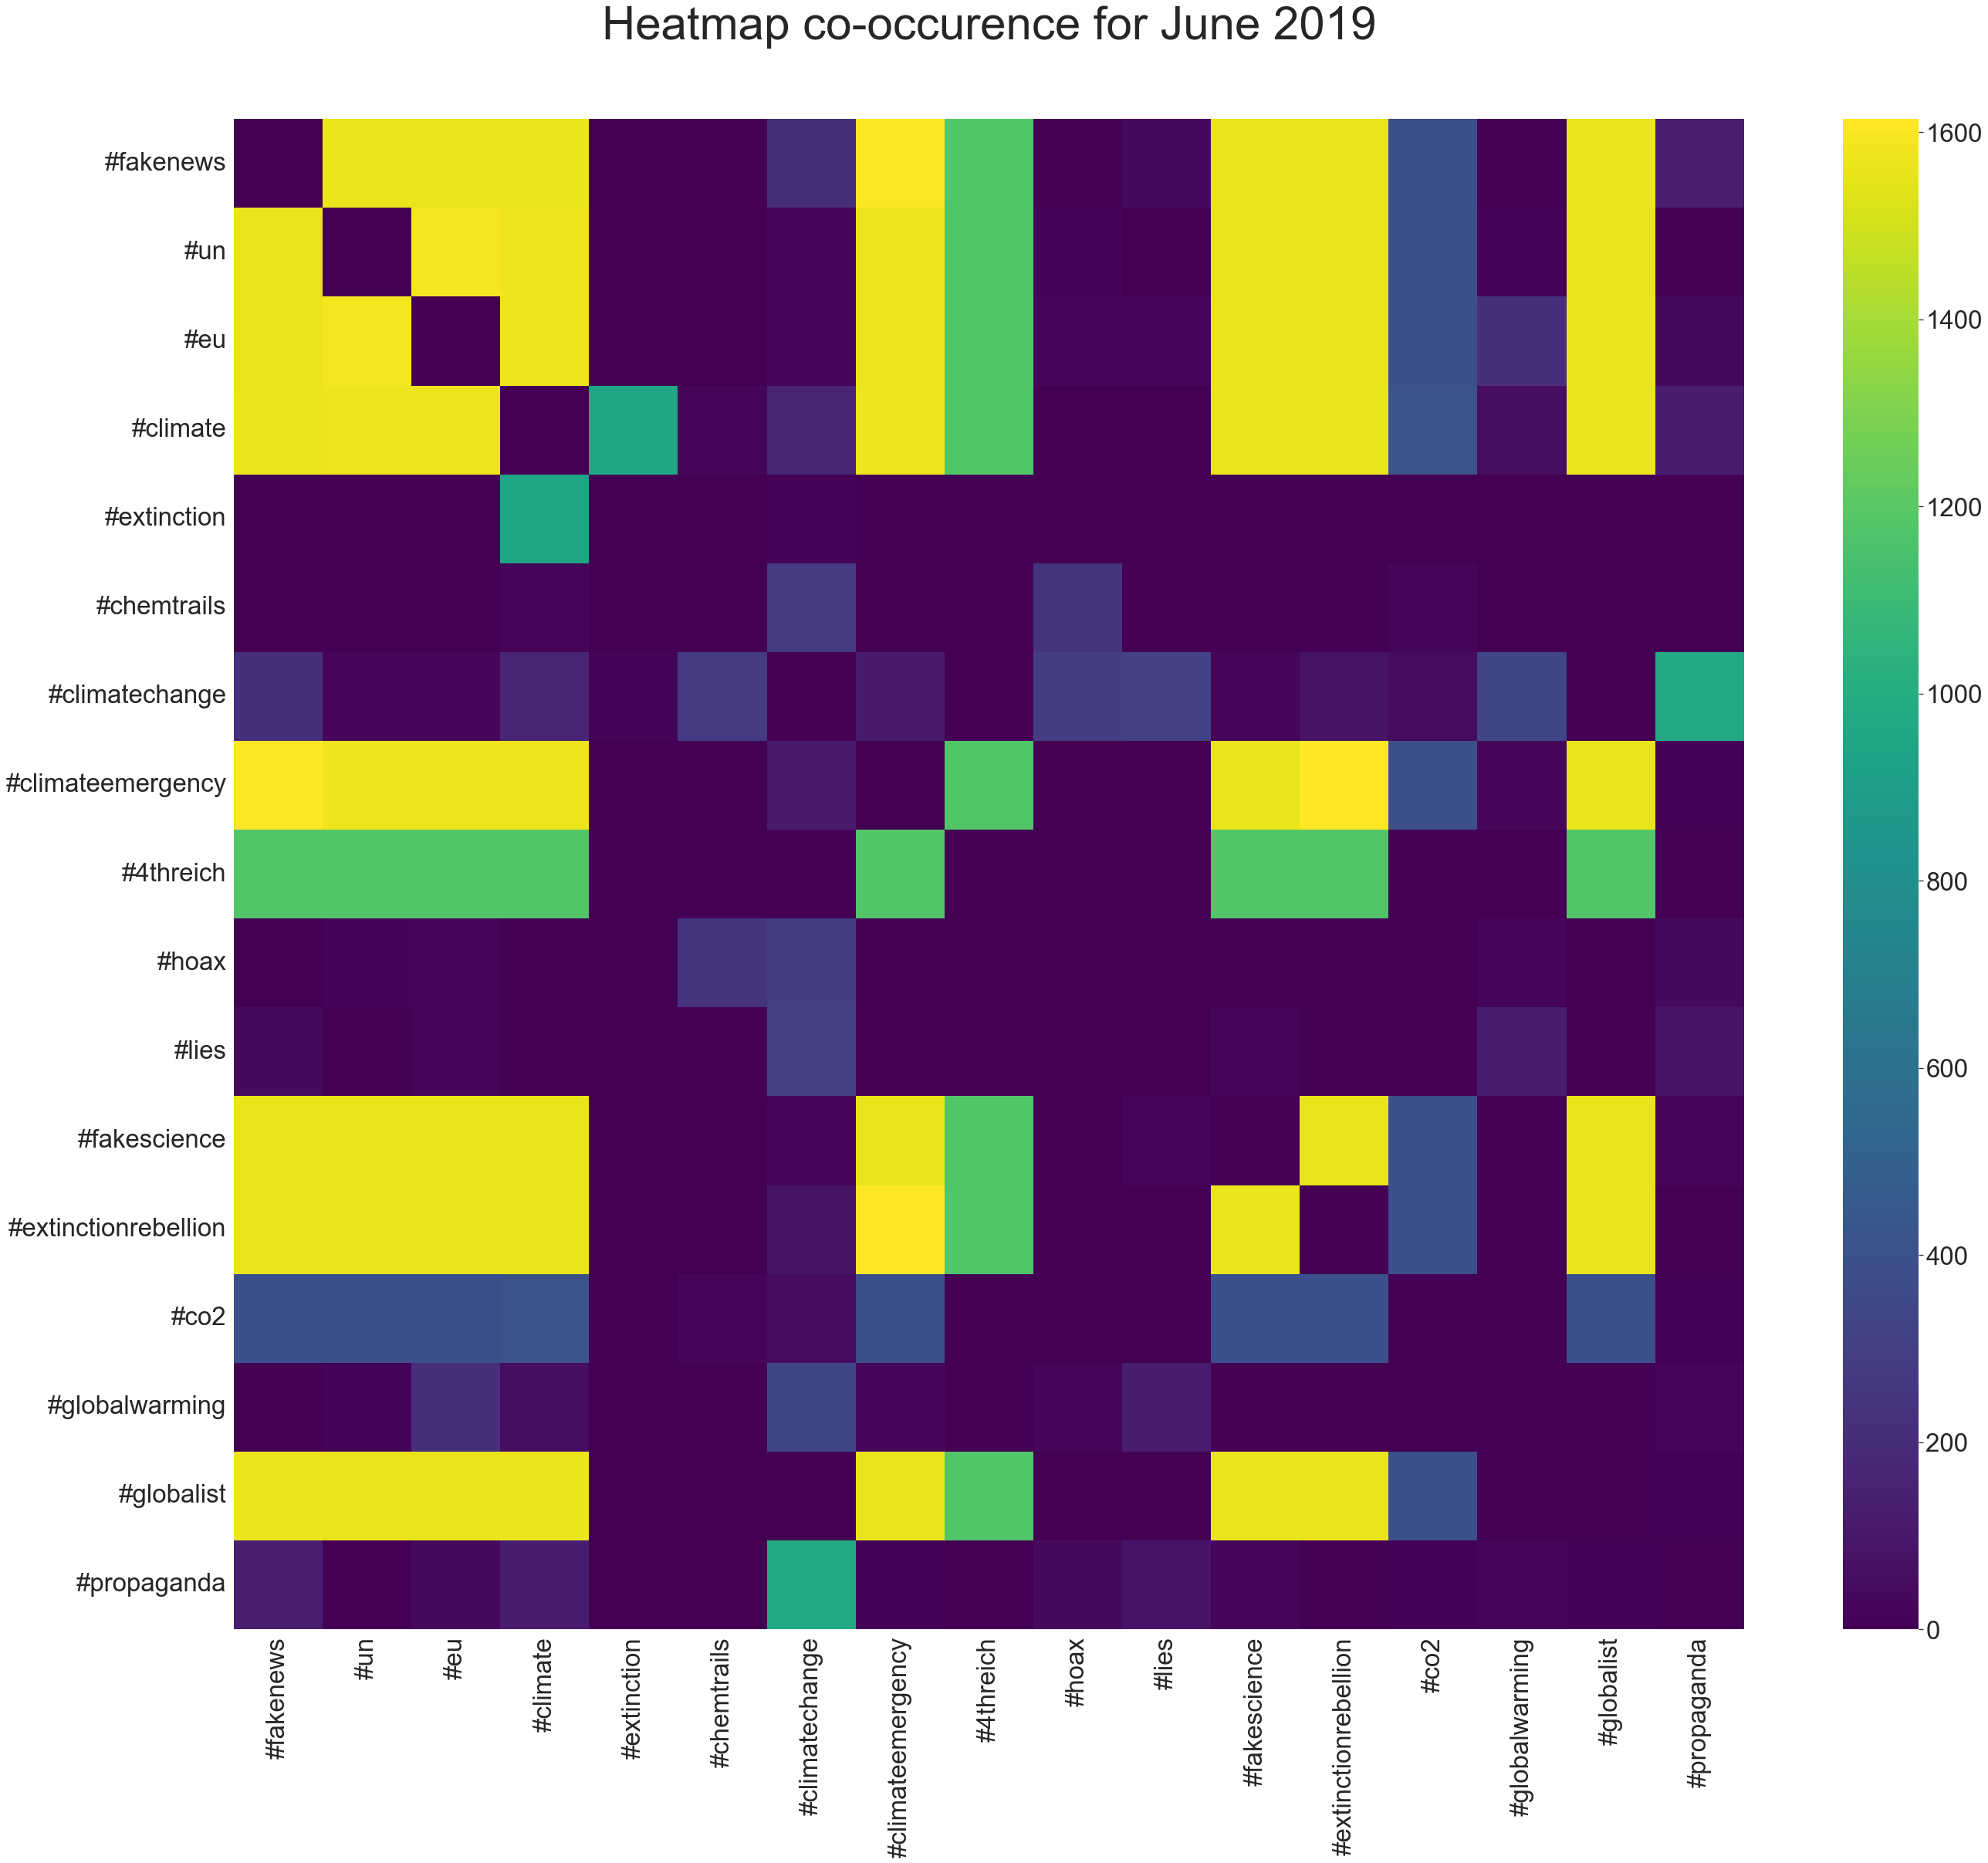

In [20]:
sns.heatmap(heatmap_df2, square=True, cmap='viridis')
plt.title("Heatmap co-occurence for June 2019", fontdict= {'fontsize': 60}, y=1.05)
plt.savefig("htags_climate_June19.png")

In [5]:
counter = Counter()

for tag in hashtag_list:
    tag.sort()
    combos = list(combinations(tag, r=2))
    counter.update(combos)


counter.most_common(50)

[(('#climateemergency', '#extinctionrebellion'), 1614),
 (('#climateemergency', '#fakenews'), 1604),
 (('#eu', '#un'), 1590),
 (('#climate', '#climateemergency'), 1571),
 (('#climate', '#eu'), 1570),
 (('#climate', '#un'), 1570),
 (('#climateemergency', '#eu'), 1570),
 (('#climateemergency', '#un'), 1570),
 (('#climate', '#fakenews'), 1567),
 (('#climate', '#globalist'), 1567),
 (('#fakenews', '#globalist'), 1567),
 (('#climate', '#extinctionrebellion'), 1558),
 (('#climate', '#fakescience'), 1558),
 (('#climateemergency', '#fakescience'), 1558),
 (('#climateemergency', '#globalist'), 1558),
 (('#eu', '#extinctionrebellion'), 1558),
 (('#eu', '#fakenews'), 1558),
 (('#eu', '#fakescience'), 1558),
 (('#eu', '#globalist'), 1558),
 (('#extinctionrebellion', '#fakenews'), 1558),
 (('#extinctionrebellion', '#fakescience'), 1558),
 (('#extinctionrebellion', '#globalist'), 1558),
 (('#extinctionrebellion', '#un'), 1558),
 (('#fakenews', '#fakescience'), 1558),
 (('#fakenews', '#un'), 1558),
 

# Most common hashtags

In [48]:
hashtags_refined = []
for _ in hashtag_list:
    if _ != []:
        hashtags_refined.extend(_)

count_htags = Counter(hashtags_refined)

# uni_htags = list(set(hashtags_refined))
# uni_htags

count_htags.most_common(10)

[('#climatechange', 7212),
 ('#climate', 4254),
 ('#fakenews', 2572),
 ('#climateemergency', 2447),
 ('#propaganda', 1879),
 ('#eu', 1841),
 ('#extinctionrebellion', 1756),
 ('#un', 1603),
 ('#fakescience', 1582),
 ('#globalist', 1567)]

# Concordance

In [52]:
print(climate_strings[0:10000])

 fake news, bud. numbers are declining, size of fires are declining. the only thing that is rising is the blood pressure of climate alarmists who aren’t getting what they want. https://t.co/uk4dset5yi has those crazy climate scientists superceded poopy fake news too far?  hey, peter! we are too educated to fall for the  weekly propaganda pictures. do some real good and focus on what ontarians and your constituents really care about: health, education, climate change, and most importantly social programmes, #not beer #ridiculouspccon  hey, dave! we are too educated to fall for the  weekly propaganda pictures. do some real good and focus on what ontarians and your constituents really care about: health, education, climate change, and most importantly social programmes, #not beer #ridiculouspccon rt : it’s also important to distinct this from the right-wing “fema camp” conspiracy, in that:
1. climate breakdown is actual… rt : this is weird conspiracy theory prepper bullshit. this is a sob

In [7]:
text = Text(climate_strings.split(" "))
concord_climate = text.concordance("#extinctionrebellion", width=150, lines=50)

Displaying 50 of 1294 matches:
olding catastrophe. #climatecrisis #bcwildfire #climateemergency #extinctionrebellion #thereisnoplanetb #pressfreedom rt : the greatest hoax: how the 
olding catastrophe. #climatecrisis #bcwildfire #climateemergency #extinctionrebellion #thereisnoplanetb #pressfreedom rt : the greatest hoax: how the 
olding catastrophe. #climatecrisis #bcwildfire #climateemergency #extinctionrebellion #thereisnoplanetb #pressfreedom rt : the greatest hoax: how the 
lobalist #fakescience #fakenews #climate fraud #un-#eu-#4threich #extinctionrebellion #climateemergency  brainwashing s…  the global warming conspirac
lobalist #fakescience #fakenews #climate fraud #un-#eu-#4threich #extinctionrebellion #climateemergency  brainwashing s… rt : #globalist #fakescience 
lobalist #fakescience #fakenews #climate fraud #un-#eu-#4threich #extinctionrebellion #climateemergency  brainwashing s… rt : #globalist #fakescience 
lobalist #fakescience #fakenews #climate fraud #un-#eu-#4threic

In [5]:
res= []
for index, row in df.iterrows():
    if "#extinctionrebellion" in row.tweet_text:
        res.append(row.tweet_text)
        
res[0:100]

['“dear #journalists of canada: start reporting #climatechange as an emergency; a 5-point plan for mainstream #media to cover fewer royal babies and more of our unfolding catastrophe. #climatecrisis #bcwildfire #climateemergency #extinctionrebellion #thereisnoplanetb #pressfreedom',
 '“dear #journalists of canada: start reporting #climatechange as an emergency; a 5-point plan for mainstream #media to cover fewer royal babies and more of our unfolding catastrophe. #climatecrisis #bcwildfire #climateemergency #extinctionrebellion #thereisnoplanetb #pressfreedom',
 '“dear #journalists of canada: start reporting #climatechange as an emergency; a 5-point plan for mainstream #media to cover fewer royal babies and more of our unfolding catastrophe. #climatecrisis #bcwildfire #climateemergency #extinctionrebellion #thereisnoplanetb #pressfreedom',
 'rt @piers_corbyn: #globalist #fakescience #fakenews #climate fraud #un-#eu-#4threich #extinctionrebellion #climateemergency  brainwashing s…',
 'r

# Random tweets


In [59]:
sample = df.sample(n=10)
pprint(sample.tweet_text)

64899091    rt @pokershash: modi’s\n\n15 lakh: never promised\n2 crore job: false, never promised\nclimate not changed: clipped, false propaganda\n\nrahul’s…
50598383         rt @ecosensenow: the “climate crisis” is a lie, a hoax, a fraud, an affront to science and logic, a travesty, an economic and social sinkho…
3622513         rt @sankrant: fake news. world over in hot tropical climates native women were often bare chested,\nas men were. western women’s “bra-burnin…
61405454         rt @ecosensenow: the “climate crisis” is a lie, a hoax, a fraud, an affront to science and logic, a travesty, an economic and social sinkho…
51885812         rt @khayhoe: usgs director reilly, a former astronaut and petroleum geologist, claims the national climate assessment used "inaccurate mode…
25214999                                                  people who call climate change "liberal propaganda" are the same people who think the earth is flat
50715721         rt @ecosensenow: the “climate crisi

In [105]:
for index, row in df.iterrows():
    if "#massachusetts" in row.tweet_text.lower() and "#misinformation" in row.tweet_text.lower():
        pprint(row.tweet_text)

('RT @YaleClimateComm: #Massachusetts is proceeding with a lawsuit against '
 'ExxonMobil for spreading #misinformation about climate change: htt…')
('RT @YaleClimateComm: #Massachusetts is proceeding with a lawsuit against '
 'ExxonMobil for spreading #misinformation about climate change: htt…')
('RT @YaleClimateComm: #Massachusetts is proceeding with a lawsuit against '
 'ExxonMobil for spreading #misinformation about climate change: htt…')
('RT @YaleClimateComm: #Massachusetts is proceeding with a lawsuit against '
 'ExxonMobil for spreading #misinformation about climate change: htt…')
('RT @YaleClimateComm: #Massachusetts is proceeding with a lawsuit against '
 'ExxonMobil for spreading #misinformation about climate change: htt…')
('RT @YaleClimateComm: #Massachusetts is proceeding with a lawsuit against '
 'ExxonMobil for spreading #misinformation about climate change: htt…')
('#Massachusetts is proceeding with a lawsuit against ExxonMobil for spreading '
 '#misinformation about c

# TF-IDF

In [4]:
no_retweets = []

for index, row in df.iterrows():
    retweet = re.match(r"^rt @+", row.tweet_text)
    if retweet:
        continue
    elif row.is_reply:
        continue
    else:
        no_retweets.append(row.tweet_text)

In [5]:
len(no_retweets)

42849

In [6]:
tfidf_data = [preprocess_text(tweet) for tweet in no_retweets]

In [7]:
tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')

tfidf_wm = tfidfvectorizer.fit_transform(tfidf_data)

tfidf_tokens = tfidfvectorizer.get_feature_names()

df_tfidfvect = pd.DataFrame(data = tfidf_wm.todense(),index = range(0,len(tfidf_data)),columns = tfidf_tokens)

In [8]:
tokens_above_threshold = df_tfidfvect.max()[df_tfidfvect.max() > 0.7].sort_values(ascending=False)

In [9]:
tokens_above_threshold

blah                          0.966488
hoax                          0.947942
savetheenvironmentin5words    0.937521
es7z3ifodz                    0.925899
yf73mm5er7                    0.917101
reeeeee                       0.914983
fortunately                   0.914983
smh                           0.913716
total                         0.905111
ffs                           0.892256
globalwarming                 0.891796
je9s2nzssg                    0.890766
yyicsdbtv8                    0.889806
wrfwc9mb9n                    0.886432
hhucxonuqw                    0.875245
dkiygspsj8                    0.873031
emergency                     0.861674
reality                       0.859639
iohzjlbcbd                    0.853731
indiana                       0.853576
epitome                       0.852971
thing                         0.836032
elxn43                        0.834861
complete                      0.833166
wl5tazjpro                    0.829880
everyplace               